In [1]:
from random import choice
from numpy import load
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
from PIL import Image
from os import listdir
from os.path import isdir
from numpy import asarray
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.models import load_model




Using TensorFlow backend.


In [2]:




# load faces
data = load('5-celebrity-faces-dataset.npz')
testX_faces = data['arr_2']
# load face embeddings
data = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

Predicted: mindy_kaling (91.597)
Expected: mindy_kaling


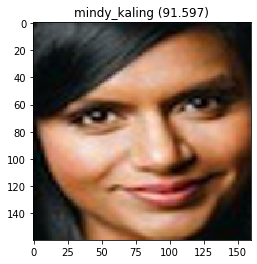

In [3]:
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()

In [4]:
# gives face(as array) from photo
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

In [5]:
# extracts embeddings from face array
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0]



In [6]:

embed_model = load_model('facenet_keras.h5')



In [7]:
def predict_photo(path):
        # get face
        face = extract_face(path)
        face_emb=get_embedding(embed_model, face)
        #samples = expand_dims(face_emb, axis=0)
        yhat_class = model.predict(face_emb.reshape(1, -1)) #samples
        yhat_prob = model.predict_proba(face_emb.reshape(1, -1)) #samples
        # get name
        class_index = yhat_class[0]
        class_probability = yhat_prob[0,class_index] * 100
        predict_names = out_encoder.inverse_transform(yhat_class)
        print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
        # plot for fun
        pyplot.imshow(face)
        title = '%s (%.3f)' % (predict_names[0], class_probability)
        pyplot.title(title)
        pyplot.show()


        
pyplot.show()

Predicted: madonna (100.000)


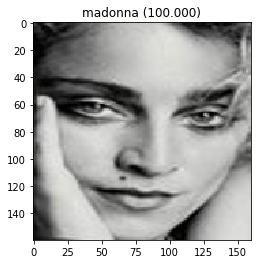

In [8]:
predict_photo('celebrity/val/madonna/httpecximagesamazoncomimagesIfmaBKWLACULSRjpg.jpg')

In [9]:
def load_faces(directory):
        #faces = list()
        # enumerate files
        for filename in listdir(directory):
            # path
            path = directory + filename
            # get face
            print(path)
            #face = extract_face(path)
            # store
            #faces.append(face)
        #return faces

In [10]:
load_faces('celebrity/val/madonna/')

celebrity/val/madonna/.DS_Store
celebrity/val/madonna/httpcdnfuncheapcomwpcontentuploadsVOGUEjpg.jpg
celebrity/val/madonna/madonna_1.jpg
celebrity/val/madonna/httpcdncdnjustjaredcomwpcontentuploadsheadlinesmadonnatalksparisattackstearsjpg.jpg
celebrity/val/madonna/httpassetsrollingstonecomassetsimagesalbumreviewaffaceabdcccaeedjpg.jpg
celebrity/val/madonna/httpecximagesamazoncomimagesIfmaBKWLACULSRjpg.jpg
